In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
age_null = train_data["Age"].isnull().sum()
age_notnull = train_data["Age"].notnull().sum()
age_all = np.array([age_null,age_notnull])
age_labels = np.array(["non-null", "null"])

In [9]:
cabin_null = train_data["Cabin"].isnull().sum()
cabin_notnull = train_data["Cabin"].notnull().sum()
cabin_all = np.array([cabin_null,cabin_notnull])
cabin_labels = np.array(["non-null", "null"])

In [10]:
Embarked_null = train_data["Embarked"].isnull().sum()
Embarked_notnull = train_data["Embarked"].notnull().sum()
Embarked_all = np.array([Embarked_null,Embarked_notnull])
Embarked_labels = np.array(["non-null", "null"])

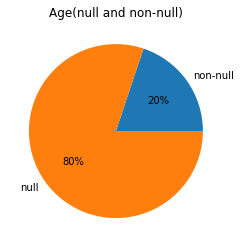

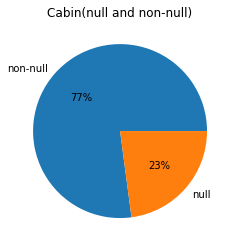

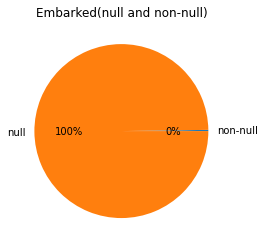

In [11]:
plt.pie(age_all, labels=age_labels, autopct='%1.0f%%')
plt.title("Age(null and non-null)")
plt.show()

plt.pie(cabin_all, labels=cabin_labels, autopct='%1.0f%%')
plt.title("Cabin(null and non-null)")
plt.show()

plt.pie(Embarked_all, labels=Embarked_labels, autopct='%1.0f%%')
plt.title("Embarked(null and non-null)")
plt.show()


# so we find out that should drop out Cabin column and fix the Age and Embarked null data.

In [12]:
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
train_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)

In [18]:
train_data["Embarked"].fillna("S", inplace=True)

In [19]:
train_obj_features = train_data.columns[train_data.dtypes=="object"]

In [20]:
train_obj_features

Index(['Sex', 'Embarked'], dtype='object')

In [21]:
train_data = pd.get_dummies(data=train_data, columns=train_obj_features, dtype="int64")

In [22]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [24]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
y_train = train_data.loc[:, "Survived"]
y_train.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [26]:
x_train = train_data.drop(columns="Survived")
x_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,1,0,0


In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
test_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [30]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [31]:
test_data["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [32]:
test_data["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [33]:
test_data["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)

In [35]:
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)

In [36]:
test_data["Embarked"].fillna("S", inplace=True)

In [37]:
test_obj_features = test_data.columns[test_data.dtypes=="object"]

In [38]:
test_obj_features

Index(['Sex', 'Embarked'], dtype='object')

In [39]:
test_data = pd.get_dummies(data=test_data, columns=test_obj_features, dtype="int64")

In [40]:
y_pred = logreg.predict(test_data)

In [46]:
y_pred = pd.DataFrame(y_pred)

In [47]:
y_test = pd.read_csv("/content/titanic_kaggler1_submission.csv")

In [50]:
y_test.drop(columns="PassengerId", inplace=True)

In [53]:
metrics.accuracy_score(y_test, y_pred)

0.916267942583732